In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import time

In [2]:
# data is the first chapter of 'Of Mice and Men' which will be our reference text to capture the frequencies 
# with which different pairs of letters appear together in the actual English language.
with open('data.txt', 'r') as file:
    data = file.read().replace('\n', '')
data = data.upper()
data

'A FEW MILES SOUTH OF SOLEDAD, THE SALINAS RIVER DROPS IN CLOSETO THE HILLSIDE BANK AND RUNS DEEP AND GREEN. THE WATER IS WARMTOO, FOR IT HAS SLIPPED TWINKLING OVER THE YELLOW SANDS IN THESUNLIGHT BEFORE REACHING THE NARROW POOL. ON ONE SIDE OF THE RIVERTHE GOLDEN FOOTHILL SLOPES CURVE UP TO THE STRONG AND ROCKY GABILANMOUNTAINS, BUT ON THE VALLEY SIDE THE WATER IS LINED WITH TREES -WILLOWS FRESH AND GREEN WITH EVERY SPRING, CARRYING IN THEIR LOWERLEAF JUNCTURES THE DEBRIS OF THE WINTER’S FLOODING; AND SYCAMORESWITH MOTTLED, WHITE, RECUMBENT LIMBS AND BRANCHES THAT ARCH OVERTHE POOL. ON THE SANDY BANK UNDER THE TREES THE LEAVES LIE DEEPAND SO CRISP THAT A LIZARD MAKES A GREAT SKITTERING IF HE RUNSAMONG THEM. RABBITS COME OUT OF THE BRUSH TO SIT ON THE SAND INTHE EVENING, AND THE DAMP FLATS ARE COVERED WITH THE NIGHT TRACKSOF ’COONS, AND WITH THE SPREAD PADS OF DOGS FROM THE RANCHES, ANDWITH THE SPLIT-WEDGE TRACKS OF DEER THAT COME TO DRINK IN THE DARK. THERE IS A PATH THROUGH THE WILLO

In [3]:
# englishOg maps characters to numbers i.e. {'A':0, 'B':1,..., ' ':26}
# numOg maps numbers to characters i.e. {0:'A', '1':B,..., 26:' '}
englishOg = {}
numOg = {}
i = 0
for ch in "ABCDEFGHIJKLMNOPQRSTUVWXYZ ":
    englishOg[ch] = i
    numOg[i] = ch
    i = i + 1

In [4]:
'''
transitioMatrix = 

    'A' 'B' ... ' '
'A'  %   %       %
'B'  %   %       % 
...  %   %       %
...  %   %       %
...  %   %       %
' '  %   %       %

transitioMatrix[A][B] = p(A,B) = probability of going from A -> B

To make this a irreducible, aperiodic, regular matrix so our calculations don't have to deal with divide by 0 errors
we will initalize this matrix with 1's, find the percentages, and make sure our rows sum to 1.
'''
transitionMatrix = np.ones((27,27))
for i in range(0,len(data)):
    if i + 1 != len(data):
        if data[i] in englishOg and data[i+1] in englishOg:
            transitionMatrix[englishOg[data[i]]][englishOg[data[i+1]]] = transitionMatrix[englishOg[data[i]]][englishOg[data[i+1]]] + 1
transitionMatrix = transitionMatrix/transitionMatrix.sum(axis=1,keepdims=1)
transitionMatrix

array([[7.20980534e-04, 3.17231435e-02, 4.61427541e-02, 3.38860851e-02,
        7.20980534e-04, 3.60490267e-03, 1.58615717e-02, 2.88392213e-03,
        7.64239366e-02, 7.20980534e-04, 9.37274694e-03, 4.39798125e-02,
        3.31651045e-02, 2.37923576e-01, 7.20980534e-04, 1.15356885e-02,
        7.20980534e-04, 6.34462870e-02, 5.69574621e-02, 1.23287671e-01,
        1.08147080e-02, 2.52343187e-02, 1.51405912e-02, 7.20980534e-04,
        4.25378515e-02, 6.48882480e-03, 1.05263158e-01],
       [1.06382979e-01, 6.68693009e-02, 3.03951368e-03, 3.03951368e-03,
        2.52279635e-01, 3.03951368e-03, 3.03951368e-03, 3.03951368e-03,
        9.42249240e-02, 3.03951368e-03, 3.03951368e-03, 6.68693009e-02,
        3.03951368e-03, 3.03951368e-03, 1.15501520e-01, 3.03951368e-03,
        3.03951368e-03, 9.72644377e-02, 9.11854103e-03, 3.03951368e-03,
        7.59878419e-02, 3.03951368e-03, 3.03951368e-03, 3.03951368e-03,
        4.55927052e-02, 3.03951368e-03, 2.12765957e-02],
       [1.87675070e-01

In [5]:
# rows sum to 1
np.sum(transitionMatrix,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
# first text we have to decipher
dec1 = "K IWBGHWI BQ HOISPX’S JBRDYZ JWYR WY QKZSI VKMTYD BGI IWYHZYYR EKHWI OI IWY YRD BQ DOKSX’S DBMT. WY WOD MBUY O EBRHJOX IB IWKS PEGY EOJR, ORD WKS DZYOU UGSI WOLY SYYUYD SBMEBSY IWOI WY MBGED WOZDEX QOKE IB HZOSV KI. WY DKD RBI TRBJIWOI KI JOS OEZYODX PYWKRD WKU, SBUYJWYZY POMT KR IWOI LOSIBPSMGZKIX PYXBRD IWY MKIX, JWYZY IWY DOZT QKYEDS BQ IWY ZYVGPEKM ZBEEYD BR GRDYZ IWY RKHWI. HOISPX PYEKYLYD KR IWY HZYYREKHWI, IWY BZHOSIKM QGIGZY IWOI XYOZ PX XYOZ ZYMYDYS PYQBZYGS. KI YEGDYD GS IWYR, PGI IWOI?S RB UOIIYZ —IB-UBZZBJ JY JKEEZGR QOSIYZ, SIZYIMW BGI BGZ OZUS QOZIWYZ. . . . ORD BRY QKRYUBZRKRH ——SB JY PYOI BR, PBOIS OHOKRSI IWY MGZZYRI, PBZRY POMTMYOSYEYSSEX KRIB IWY VOSI."

In [7]:
# second text we have to decipher
dec2 = "KI JOS IWY PYSI BQ IKUYS, KI JOS IWY JBZSI BQ IKUYS, KI JOS IWY OHYBQ JKSDBU, KI JOS IWY OHY BQ QBBEKSWRYSS, KI JOS IWY YVBMW BQPYEKYQ, KI JOS IWY YVBMW BQ KRMZYDGEKIX, KI JOS IWY SYOSBR BQEKHWI, KI JOS IWY SYOSBR BQ DOZTRYSS, KI JOS IWY SVZKRH BQ WBVY,KI JOS IWY JKRIYZ BQ DYSVOKZ, JY WOD YLYZXIWKRH PYQBZY GS, JYWOD RBIWKRH PYQBZY GS, JY JYZY OEE HBKRH DKZYMI IB WYOLYR, JYJYZY OEE HBKRH DKZYMI IWY BIWYZ JOX–KR SWBZI, IWY VYZKBD JOSSB QOZ EKTY IWY VZYSYRI VYZKBD, IWOI SBUY BQ KIS RBKSKYSI OGIWBZKIKYS KRSKSIYD BR KIS PYKRH ZYMYKLYD, QBZ HBBD BZ QBZ YLKE, KRIWY SGVYZEOIKLY DYHZYY BQ MBUVOZKSBR BREX.IWYZY JYZY O TKRHJKIW O EOZHY COJ ORD O FGYYR JKIW O VEOKR QOMY, BR IWY IWZBRYBQ YRHEORD; IWYZY JYZY O TKRH JKIW O EOZHY COJ ORD O FGYYRJKIW O QOKZ QOMY, BR IWY IWZBRY BQ QZORMY. KR PBIW MBGRIZKYSKI JOS MEYOZYZ IWOR MZXSIOE IB IWY EBZDS BQ IWY SIOIY VZYSYZLYSBQ EBOLYS ORD QKSWYS, IWOI IWKRHS KR HYRYZOE JYZY SYIIEYD QBZYLYZ."

In [8]:
# initial cipher, which I will call phi, that reverses the order of the alphabet
start = {}
inp = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "
j = len(inp)-1
for i in range(len(inp)):
    start[inp[i]] = inp[j]
    j = j - 1

In [9]:
# returns the natural log of f(text|cipher)
def lg(text,phi):
    val = 0
    for i in range(0,len(text)):
        if i+1 != len(text):
            if text[i] in phi and text[i+1] in phi:
                val = val + np.log(transitionMatrix[englishOg[phi[text[i]]]][englishOg[phi[text[i+1]]]])
    return val

In [10]:
# MCMC Metropolis Hastings
# return most recent cipher(phi), accept ratio, accepted natural log's of f(text|cipher), all accepted ciphers(phis)
def mh(text,phi,n_iter):
    accept = 0
    lg_now = lg(text,phi)
    out = []
    
    cands = stats.randint.rvs(0, 27, size = n_iter*2, random_state=12)
    cands1 = np.split(cands, 2)[0]
    cands2 = np.split(cands, 2)[1]
    uS = stats.uniform.rvs(size = n_iter, random_state=12)
    
    samples = []
    
    for i in range(n_iter):
        cand1 = cands1[i]
        cand2 = cands2[i]
        
        if cand1 == cand2:
            out.append(lg_now)
            samples.append(phi)
            continue
        
        phi2 = phi.copy()
        tmp1 = phi2[numOg[cand1]]
        tmp2 = phi2[numOg[cand2]]
        phi2[numOg[cand1]] = tmp2
        phi2[numOg[cand2]] = tmp1
        
        lg_cand = lg(text,phi2)
        lalpha = lg_cand-lg_now
        alpha = np.exp(lalpha)
        
        u = uS[i]
        
        # the if statement below allows us to figure out the distribution of the text we have to decipher
        
        if u < alpha:
            lg_now = lg_cand
            accept = accept + 1
            phi = phi2
        
        out.append(lg_now)
        samples.append(phi)
    
    return phi, accept/n_iter, out, samples

In [11]:
# sample and decipher text 1
N = 10000
start_time = time.time()
ans = mh(dec1,start.copy(),N)
print("--- %s seconds ---" % (time.time() - start_time))
print()
print(ans[1],ans[1]*N)
print()
translate = ans[0]
tmp = ""
for ch in dec1:
    if ch in translate:
        tmp = tmp + translate[ch]
    else:
        tmp = tmp + ch
print(dec1)
print()
print(tmp)

--- 12.39876675605774 seconds ---

0.0276 276.0

K IWBGHWI BQ HOISPX’S JBRDYZ JWYR WY QKZSI VKMTYD BGI IWYHZYYR EKHWI OI IWY YRD BQ DOKSX’S DBMT. WY WOD MBUY O EBRHJOX IB IWKS PEGY EOJR, ORD WKS DZYOU UGSI WOLY SYYUYD SBMEBSY IWOI WY MBGED WOZDEX QOKE IB HZOSV KI. WY DKD RBI TRBJIWOI KI JOS OEZYODX PYWKRD WKU, SBUYJWYZY POMT KR IWOI LOSIBPSMGZKIX PYXBRD IWY MKIX, JWYZY IWY DOZT QKYEDS BQ IWY ZYVGPEKM ZBEEYD BR GRDYZ IWY RKHWI. HOISPX PYEKYLYD KR IWY HZYYREKHWI, IWY BZHOSIKM QGIGZY IWOI XYOZ PX XYOZ ZYMYDYS PYQBZYGS. KI YEGDYD GS IWYR, PGI IWOI?S RB UOIIYZ —IB-UBZZBJ JY JKEEZGR QOSIYZ, SIZYIMW BGI BGZ OZUS QOZIWYZ. . . . ORD BRY QKRYUBZRKRH ——SB JY PYOI BR, PBOIS OHOKRSI IWY MGZZYRI, PBZRY POMTMYOSYEYSSEX KRIB IWY VOSI.

I THOUGHT OF GATSBY’S WONDER WHEN HE FIRST PICKED OUT THEGREEN LIGHT AT THE END OF DAISY’S DOCK. HE HAD COME A LONGWAY TO THIS BLUE LAWN, AND HIS DREAM MUST HAVE SEEMED SOCLOSE THAT HE COULD HARDLY FAIL TO GRASP IT. HE DID NOT KNOWTHAT IT WAS ALREADY BEHIND HIM, SOMEWHE

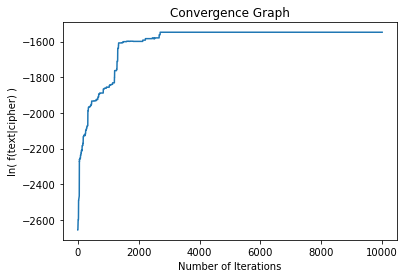

In [12]:
# check burn-in which happens around 4000 iterations
x = list(range(0,N))
y = ans[2]
plt.plot(x,y)
plt.xlabel('Number of Iterations') 
plt.ylabel('ln( f(text|cipher) )') 
plt.title("Convergence Graph")
plt.show()

In [13]:
# sample from the samples we keep after burn-in
samples = ans[3]
burnIn = 4000
samples = samples[burnIn:]
sample = samples[stats.randint.rvs(0, len(samples), size = 1, random_state=12)[0]]

In [14]:
# decipher text 1 using the sample we obtain
translate = sample
tmp = ""
for ch in dec1:
    if ch in translate:
        tmp = tmp + translate[ch]
    else:
        tmp = tmp + ch
print(dec1)
print()
print(tmp)

K IWBGHWI BQ HOISPX’S JBRDYZ JWYR WY QKZSI VKMTYD BGI IWYHZYYR EKHWI OI IWY YRD BQ DOKSX’S DBMT. WY WOD MBUY O EBRHJOX IB IWKS PEGY EOJR, ORD WKS DZYOU UGSI WOLY SYYUYD SBMEBSY IWOI WY MBGED WOZDEX QOKE IB HZOSV KI. WY DKD RBI TRBJIWOI KI JOS OEZYODX PYWKRD WKU, SBUYJWYZY POMT KR IWOI LOSIBPSMGZKIX PYXBRD IWY MKIX, JWYZY IWY DOZT QKYEDS BQ IWY ZYVGPEKM ZBEEYD BR GRDYZ IWY RKHWI. HOISPX PYEKYLYD KR IWY HZYYREKHWI, IWY BZHOSIKM QGIGZY IWOI XYOZ PX XYOZ ZYMYDYS PYQBZYGS. KI YEGDYD GS IWYR, PGI IWOI?S RB UOIIYZ —IB-UBZZBJ JY JKEEZGR QOSIYZ, SIZYIMW BGI BGZ OZUS QOZIWYZ. . . . ORD BRY QKRYUBZRKRH ——SB JY PYOI BR, PBOIS OHOKRSI IWY MGZZYRI, PBZRY POMTMYOSYEYSSEX KRIB IWY VOSI.

I THOUGHT OF GATSBY’S WONDER WHEN HE FIRST PICKED OUT THEGREEN LIGHT AT THE END OF DAISY’S DOCK. HE HAD COME A LONGWAY TO THIS BLUE LAWN, AND HIS DREAM MUST HAVE SEEMED SOCLOSE THAT HE COULD HARDLY FAIL TO GRASP IT. HE DID NOT KNOWTHAT IT WAS ALREADY BEHIND HIM, SOMEWHERE BACK IN THAT VASTOBSCURITY BEYOND THE CITY, WH

In [15]:
# sample and decipher text 2
N=100000
start_time = time.time()
ans = mh(dec2,start.copy(),N)
print("--- %s seconds ---" % (time.time() - start_time))
print()
print(ans[1],ans[1]*N)
print()
translate = ans[0]
tmp = ""
for ch in dec2:
    if ch in translate:
        tmp = tmp + translate[ch]
    else:
        tmp = tmp + ch
print(dec2)
print()
print(tmp)

--- 175.23917818069458 seconds ---

0.00566 566.0

KI JOS IWY PYSI BQ IKUYS, KI JOS IWY JBZSI BQ IKUYS, KI JOS IWY OHYBQ JKSDBU, KI JOS IWY OHY BQ QBBEKSWRYSS, KI JOS IWY YVBMW BQPYEKYQ, KI JOS IWY YVBMW BQ KRMZYDGEKIX, KI JOS IWY SYOSBR BQEKHWI, KI JOS IWY SYOSBR BQ DOZTRYSS, KI JOS IWY SVZKRH BQ WBVY,KI JOS IWY JKRIYZ BQ DYSVOKZ, JY WOD YLYZXIWKRH PYQBZY GS, JYWOD RBIWKRH PYQBZY GS, JY JYZY OEE HBKRH DKZYMI IB WYOLYR, JYJYZY OEE HBKRH DKZYMI IWY BIWYZ JOX–KR SWBZI, IWY VYZKBD JOSSB QOZ EKTY IWY VZYSYRI VYZKBD, IWOI SBUY BQ KIS RBKSKYSI OGIWBZKIKYS KRSKSIYD BR KIS PYKRH ZYMYKLYD, QBZ HBBD BZ QBZ YLKE, KRIWY SGVYZEOIKLY DYHZYY BQ MBUVOZKSBR BREX.IWYZY JYZY O TKRHJKIW O EOZHY COJ ORD O FGYYR JKIW O VEOKR QOMY, BR IWY IWZBRYBQ YRHEORD; IWYZY JYZY O TKRH JKIW O EOZHY COJ ORD O FGYYRJKIW O QOKZ QOMY, BR IWY IWZBRY BQ QZORMY. KR PBIW MBGRIZKYSKI JOS MEYOZYZ IWOR MZXSIOE IB IWY EBZDS BQ IWY SIOIY VZYSYZLYSBQ EBOLYS ORD QKSWYS, IWOI IWKRHS KR HYRYZOE JYZY SYIIEYD QBZYLYZ.

IT WAS THE BEST OF 

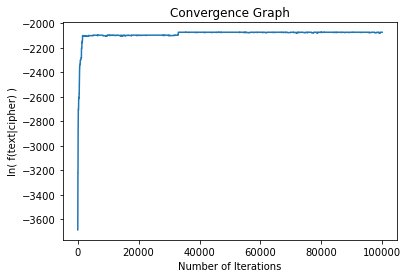

In [16]:
# check burn-in which happens around 40000 iterations
x = list(range(0,N))
y = ans[2]
plt.plot(x,y)
plt.xlabel('Number of Iterations') 
plt.ylabel('ln( f(text|cipher) )') 
plt.title("Convergence Graph")
plt.show()

In [17]:
# sample from the samples we keep after burn-in
samples = ans[3]
burnIn = 40000
samples = samples[burnIn:]
sample = samples[stats.randint.rvs(0, len(samples), size = 1, random_state=12)[0]]

In [18]:
# decipher text 2 using the sample we obtain
translate = sample
tmp = ""
for ch in dec2:
    if ch in translate:
        tmp = tmp + translate[ch]
    else:
        tmp = tmp + ch
print(dec2)
print()
print(tmp)

KI JOS IWY PYSI BQ IKUYS, KI JOS IWY JBZSI BQ IKUYS, KI JOS IWY OHYBQ JKSDBU, KI JOS IWY OHY BQ QBBEKSWRYSS, KI JOS IWY YVBMW BQPYEKYQ, KI JOS IWY YVBMW BQ KRMZYDGEKIX, KI JOS IWY SYOSBR BQEKHWI, KI JOS IWY SYOSBR BQ DOZTRYSS, KI JOS IWY SVZKRH BQ WBVY,KI JOS IWY JKRIYZ BQ DYSVOKZ, JY WOD YLYZXIWKRH PYQBZY GS, JYWOD RBIWKRH PYQBZY GS, JY JYZY OEE HBKRH DKZYMI IB WYOLYR, JYJYZY OEE HBKRH DKZYMI IWY BIWYZ JOX–KR SWBZI, IWY VYZKBD JOSSB QOZ EKTY IWY VZYSYRI VYZKBD, IWOI SBUY BQ KIS RBKSKYSI OGIWBZKIKYS KRSKSIYD BR KIS PYKRH ZYMYKLYD, QBZ HBBD BZ QBZ YLKE, KRIWY SGVYZEOIKLY DYHZYY BQ MBUVOZKSBR BREX.IWYZY JYZY O TKRHJKIW O EOZHY COJ ORD O FGYYR JKIW O VEOKR QOMY, BR IWY IWZBRYBQ YRHEORD; IWYZY JYZY O TKRH JKIW O EOZHY COJ ORD O FGYYRJKIW O QOKZ QOMY, BR IWY IWZBRY BQ QZORMY. KR PBIW MBGRIZKYSKI JOS MEYOZYZ IWOR MZXSIOE IB IWY EBZDS BQ IWY SIOIY VZYSYZLYSBQ EBOLYS ORD QKSWYS, IWOI IWKRHS KR HYRYZOE JYZY SYIIEYD QBZYLYZ.

IT WAS THE BEST OF TIMES, IT WAS THE WORST OF TIMES, IT WAS THE AGEOF 